In [ ]:
import os

for dataset in ["BGL"]:
    log_path = os.path.join("datasets", dataset, f"{dataset}.log")
    if os.path.exists(log_path):
        print(f"=== {dataset} ===")
        with open(log_path, "r", errors="ignore") as f:
            for i in range(10):
                line = f.readline()
                if not line:
                    break  # Stop if file has fewer than 5 lines
                print(line.strip())
        print()  # Blank line between datasets
    else:
        print(f"❌ Log file not found for {dataset}: {log_path}")


=== BGL ===
- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.363779 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.527847 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.675872 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.823719 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.982731 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
- 1117838571 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.51.131467 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
- 1117838571 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.51.293532 R02-M1-N0-C:J12-U11 RAS KERNE

In [2]:
import os
import pandas as pd

# Number of lines to read
n = 2

# Define file paths
files = [
    os.path.join("../preprocess_BGL/parsed_logs", "BGL_parsed.csv"),
    os.path.join("../preprocess_HDFS/parsed_logs", "HDFS_parsed.csv"),
]

# Loop through each file and display the first n lines + column names
for file_path in files:
    if os.path.exists(file_path):
        print(f"=== {os.path.basename(file_path)} ===")
        df = pd.read_csv(file_path, nrows=n)
        
        # Print column names
        print("Columns:", list(df.columns))
        print()

        # Print each row as dictionary for full visibility
        for idx, row in df.iterrows():
            print(f"Row {idx}:")
            for col, val in row.items():
                print(f"  {col}: {val}")
            print()
    else:
        print(f"❌ File not found: {file_path}")


=== BGL_parsed.csv ===
Columns: ['Label', 'Timestamp', 'Date', 'Node', 'Time', 'NodeRepeat', 'Type', 'Component', 'Level', 'Content', 'LineId', 'EventId', 'EventTemplate', 'ParameterList']

Row 0:
  Label: -
  Timestamp: 1117838570
  Date: 2005.06.03
  Node: R02-M1-N0-C:J12-U11
  Time: 2005-06-03-15.42.50.363779
  NodeRepeat: R02-M1-N0-C:J12-U11
  Type: RAS
  Component: KERNEL
  Level: INFO
  Content: instruction cache parity error corrected
  LineId: 1
  EventId: 1
  EventTemplate: instruction cache parity error corrected
  ParameterList: []

Row 1:
  Label: -
  Timestamp: 1117838570
  Date: 2005.06.03
  Node: R02-M1-N0-C:J12-U11
  Time: 2005-06-03-15.42.50.527847
  NodeRepeat: R02-M1-N0-C:J12-U11
  Type: RAS
  Component: KERNEL
  Level: INFO
  Content: instruction cache parity error corrected
  LineId: 2
  EventId: 1
  EventTemplate: instruction cache parity error corrected
  ParameterList: []

=== HDFS_parsed.csv ===
Columns: ['Date', 'Time', 'PID', 'Level', 'Component', 'Content', 

Total traces: 102795
   TaskID Node  start_timestamp  end_timestamp  IsAbnormal  num_events
0       0    -       1119415930     1121453190           0          50
1       1    -       1121454011     1124217176           0          50
2       2    -       1124217987     1125504644           0          50
3       3    -       1125512157     1129724282           0          50
4       4    -       1129737882     1131483843           0          50

Label distribution:
IsAbnormal
0    62348
1    40447
Name: count, dtype: int64

Percentage distribution:
IsAbnormal
0    60.65
1    39.35
Name: count, dtype: float64


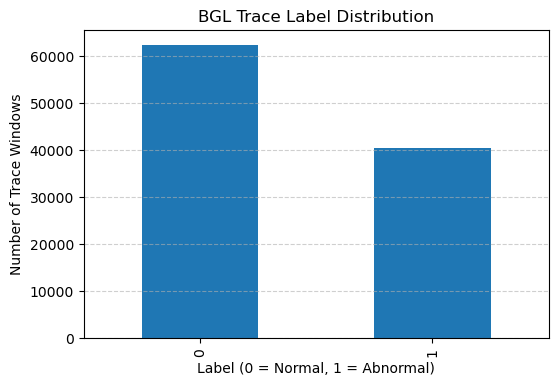

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load the traces file ---
traces_path = "../master_tables/BGL/test2/traces.csv"
df = pd.read_csv(traces_path)

# --- Basic info ---
print("Total traces:", len(df))
print(df.head())

# --- Label distribution ---
label_counts = df['IsAbnormal'].value_counts().sort_index()

print("\nLabel distribution:")
print(label_counts)

# --- Percentages ---
print("\nPercentage distribution:")
print((label_counts / len(df) * 100).round(2))

# --- Plot ---
plt.figure(figsize=(6,4))
label_counts.plot(kind="bar")
plt.title("BGL Trace Label Distribution")
plt.xlabel("Label (0 = Normal, 1 = Abnormal)")
plt.ylabel("Number of Trace Windows")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Number of traces : 69724
Average events per trace : 50.0
Median events per trace  : 50.0
Min events per trace     : 50
Max events per trace     : 50

--- Top 10 traces with most events ---
TaskID
0        50
51830    50
51836    50
51835    50
51834    50
51833    50
51832    50
51831    50
5183     50
5167     50
dtype: int64


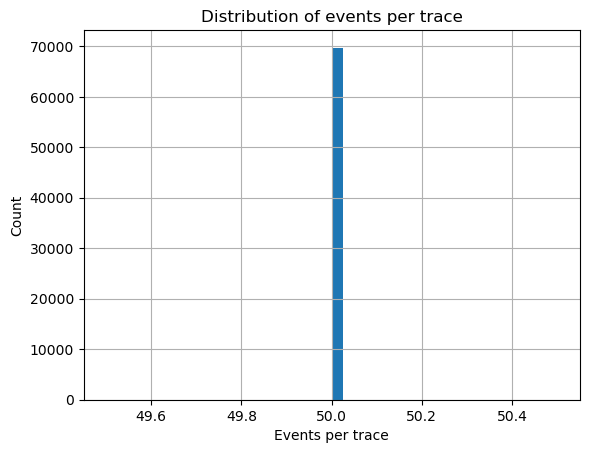

In [1]:
import pandas as pd

# Path to your events file
events_path = "../master_tables/BGL/test/events.csv"

# Load CSV
df = pd.read_csv(events_path)

# Ensure TaskID is treated as string (important!)
df["TaskID"] = df["TaskID"].astype(str)

# Count events per trace
events_per_trace = df.groupby("TaskID").size()

# Print stats
print("Number of traces :", len(events_per_trace))
print("Average events per trace :", events_per_trace.mean())
print("Median events per trace  :", events_per_trace.median())
print("Min events per trace     :", events_per_trace.min())
print("Max events per trace     :", events_per_trace.max())

print("\n--- Top 10 traces with most events ---")
print(events_per_trace.sort_values(ascending=False).head(10))

# (Optional) histogram
try:
    import matplotlib.pyplot as plt
    events_per_trace.hist(bins=40)
    plt.title("Distribution of events per trace")
    plt.xlabel("Events per trace")
    plt.ylabel("Count")
    plt.show()
except ImportError:
    pass


In [27]:
import pandas as pd
import os

# Path to your parsed BGL CSV
csv_path = os.path.join("../preprocess_BGL", "parsed_logs", "BGL_parsed.csv")

# Load CSV
df = pd.read_csv(csv_path)

bad_node = "R30-M0-N9-C:J16-U01"
before = len(df)
df = df[df["Node"] != bad_node].copy()
after = len(df)
print(f"   -> 🔍 Filtrage du noeud {bad_node} : {before - after} logs supprimés, {after} restants.")

print("=== BGL_parsed.csv loaded ===")
print(f"Total logs: {len(df):,}")
print(f"Columns: {list(df.columns)}\n")

# Group by Node and count logs
counts = df.groupby("Node").size().sort_values(ascending=False)

print("Top 10 nodes with the most logs:")
print(counts.head(10), "\n")

print("Summary statistics (logs per Node):")
print(counts.describe())


   -> 🔍 Filtrage du noeud R30-M0-N9-C:J16-U01 : 152329 logs supprimés, 4595634 restants.
=== BGL_parsed.csv loaded ===
Total logs: 4,595,634
Columns: ['Label', 'Timestamp', 'Date', 'Node', 'Time', 'NodeRepeat', 'Type', 'Component', 'Level', 'Content', 'LineId', 'EventId', 'EventTemplate', 'ParameterList']

Top 10 nodes with the most logs:
Node
R02-M1-N0-C:J12-U11    64651
R37-M1-NC-C:J02-U11    35288
UNKNOWN_LOCATION       27039
R16-M1-N2-C:J17-U01    16921
R26-M0-N0-I:J18-U11    14876
R02-M0-N4-C:J04-U11    14051
R06-M1-N6-C:J15-U01     4763
R55-M0-N9-C:J06-U11     4751
R26-M0-NB-C:J07-U01     4720
R30-M0-N7-C:J09-U01     4510
dtype: int64 

Summary statistics (logs per Node):
count    69250.000000
mean        65.073473
std        328.268621
min          1.000000
25%         10.000000
50%         46.000000
75%         82.000000
max      64651.000000
dtype: float64


In [23]:
import pandas as pd
import os

# Path to your parsed BGL CSV
csv_path = os.path.join("../preprocess_BGL", "parsed_logs", "BGL_parsed.csv")

# Load CSV
df = pd.read_csv(csv_path)

print("=== BGL_parsed.csv loaded ===")
print(f"Total logs: {len(df):,}")
print(f"Columns: {list(df.columns)}\n")

# Boolean anomaly flag
df["IsAnomaly"] = df["Label"] != "-"

# Logs per node
logs_per_node = df.groupby("Node").size()

# Anomalies per node
anoms_per_node = df.groupby("Node")["IsAnomaly"].sum()

# Merge
stats = pd.DataFrame({
    "Logs": logs_per_node,
    "Anomalies": anoms_per_node
})
stats["Anomaly_Ratio"] = stats["Anomalies"] / stats["Logs"]

# Sort (largest anomaly count first)
stats_sorted = stats.sort_values("Anomalies", ascending=False)

print("Top 10 nodes with MOST anomalies:")
print(stats_sorted.head(30), "\n")

print("=== Summary statistics ===")
print("Logs per Node:")
print(stats['Logs'].describe(), "\n")

print("Anomalies per Node:")
print(stats['Anomalies'].describe(), "\n")

print("Anomaly Ratio per Node:")
print(stats['Anomaly_Ratio'].describe(), "\n")

print(f"GLOBAL anomaly rate: {df['IsAnomaly'].mean():.4f}")

=== BGL_parsed.csv loaded ===
Total logs: 4,747,963
Columns: ['Label', 'Timestamp', 'Date', 'Node', 'Time', 'NodeRepeat', 'Type', 'Component', 'Level', 'Content', 'LineId', 'EventId', 'EventTemplate', 'ParameterList']

Top 10 nodes with MOST anomalies:
                       Logs  Anomalies  Anomaly_Ratio
Node                                                 
R30-M0-N9-C:J16-U01  152329     152185       0.999055
R00-M0-NC-I:J18-U11     524        169       0.322519
R63-M0-L2-U21-A         160        160       1.000000
R50-M1-NC-I:J18-U11     411        148       0.360097
R00-M0-N0-I:J18-U11     478        131       0.274059
R00-M0-N4-I:J18-U01     479        128       0.267223
R00-M0-N4-I:J18-U11     524        126       0.240458
R00-M0-N0-I:J18-U01     475        126       0.265263
R00-M0-N8-I:J18-U01     470        125       0.265957
R00-M0-N8-I:J18-U11     479        124       0.258873
R00-M0-NC-I:J18-U01     470        120       0.255319
R06-M0-NC-I:J18-U11     412        117       

In [25]:
import pandas as pd
import os

# Path to parsed BGL CSV
csv_path = os.path.join("../preprocess_BGL", "parsed_logs", "BGL_parsed.csv")

# Load CSV
df = pd.read_csv(csv_path)

print("=== BGL_parsed.csv loaded ===")
print(f"Total logs: {len(df):,}\n")

# Group by Node once
grouped = df.groupby("Node")

# Compute stats for every node
stats = grouped["Label"].agg(
    Logs="count",
    Anomalies=lambda x: (x != "-").sum()
)

# Add ratio
stats["Anomaly_Ratio"] = stats["Anomalies"] / stats["Logs"]

# Sort by anomaly ratio (descending)
stats_sorted = stats.sort_values("Anomaly_Ratio", ascending=False)

# Show top 10 nodes by anomaly ratio
print("Top 10 nodes sorted by anomaly ratio:")
print(stats_sorted.head(30).to_string())


=== BGL_parsed.csv loaded ===
Total logs: 4,747,963

Top 10 nodes sorted by anomaly ratio:
                       Logs  Anomalies  Anomaly_Ratio
Node                                                 
R61-M0-L3-U21-C           2          2       1.000000
R63-M0-L0-U19-A           2          2       1.000000
R63-M0-L2-U21-A         160        160       1.000000
R22-M0-L0-U22-D           4          4       1.000000
R07-M1-L1-U19-E          24         24       1.000000
R56-M1-L3-U22-C           4          4       1.000000
R55-M0-Nd-C:J08-U01       1          1       1.000000
R72-M1-L1-U18-A           6          6       1.000000
R30-M0-N9-C:J16-U01  152329     152185       0.999055
R42-M0-NC-C:J12-U01      26         20       0.769231
R46-M1-N4-C:J12-U01      29         22       0.758621
R55-M0-NC-C:J16-U01      31         23       0.741935
R43-M1-N4-C:J16-U01      23         17       0.739130
R50-M0-N0-C:J12-U01      23         17       0.739130
R47-M0-NC-C:J12-U01      23         17       

In [26]:
import pandas as pd
import os

# Path to parsed BGL CSV
csv_path = os.path.join("../preprocess_BGL", "parsed_logs", "BGL_parsed.csv")

# Load CSV
df = pd.read_csv(csv_path)

# Total logs
total_logs = len(df)

# Anomalies = Label ≠ "-"
total_anomalies = (df["Label"] != "-").sum()

# Normal logs
total_normals = (df["Label"] == "-").sum()

print("=== Global anomaly statistics ===")
print(f"Total logs:      {total_logs:,}")
print(f"Total anomalies: {total_anomalies:,}")
print(f"Total normal:    {total_normals:,}")
print(f"Anomaly ratio:   {total_anomalies / total_logs:.4%}")


=== Global anomaly statistics ===
Total logs:      4,747,963
Total anomalies: 348,460
Total normal:    4,399,503
Anomaly ratio:   7.3391%


In [12]:
import pandas as pd
import os

# Path to parsed BGL CSV
csv_path = os.path.join("../preprocess_BGL", "parsed_logs", "BGL_parsed.csv")

# Load CSV
df = pd.read_csv(csv_path)

print("=== BGL_parsed.csv loaded ===")
print(f"Total logs: {len(df):,}")
print()

# --- Group by Node ---
grouped = df.groupby("Node")

# Count logs per node
counts = grouped.size().sort_values(ascending=False)

print("Top 10 busiest nodes (with anomaly ratios):")

rows = []
for node, total_logs in counts.head(10).items():
    subset = grouped.get_group(node)
    anomalies = (subset["Label"] != "-").sum()
    ratio = anomalies / total_logs if total_logs > 0 else 0
    rows.append((node, total_logs, anomalies, ratio))

# Display clean table
top_df = pd.DataFrame(rows, columns=["Node", "Logs", "Anomalies", "Anomaly_Ratio"])
print(top_df.to_string(index=False))


=== BGL_parsed.csv loaded ===
Total logs: 4,747,963

Top 10 busiest nodes (with anomaly ratios):
               Node   Logs  Anomalies  Anomaly_Ratio
R30-M0-N9-C:J16-U01 152329     152185       0.999055
R02-M1-N0-C:J12-U11  64651         19       0.000294
R37-M1-NC-C:J02-U11  35288          1       0.000028
   UNKNOWN_LOCATION  27039          0       0.000000
R16-M1-N2-C:J17-U01  16921          3       0.000177
R26-M0-N0-I:J18-U11  14876         98       0.006588
R02-M0-N4-C:J04-U11  14051          7       0.000498
R06-M1-N6-C:J15-U01   4763          3       0.000630
R55-M0-N9-C:J06-U11   4751          0       0.000000
R26-M0-NB-C:J07-U01   4720          2       0.000424


In [17]:
import pandas as pd
import os

# Path to parsed BGL CSV
csv_path = os.path.join("../preprocess_BGL", "parsed_logs", "BGL_parsed.csv")

# Load CSV
df = pd.read_csv(csv_path)

print("=== BGL_parsed.csv loaded ===")
print(f"Total logs: {len(df):,}")
print()

# Group by Node
grouped = df.groupby("Node")

# Count nodes with at least one anomaly
nodes_with_anom = (grouped["Label"].apply(lambda s: (s != "-").any()))
num_nodes_with_anom = nodes_with_anom.sum()
total_nodes = nodes_with_anom.size

percentage = (num_nodes_with_anom / total_nodes) * 100

print(f"Total nodes: {total_nodes}")
print(f"Nodes with ≥1 anomaly: {num_nodes_with_anom}")
print(f"Percentage: {percentage:.2f}%")


=== BGL_parsed.csv loaded ===
Total logs: 4,747,963

Total nodes: 69251
Nodes with ≥1 anomaly: 31374
Percentage: 45.30%


In [18]:
import pandas as pd
import os

# Path to parsed BGL CSV
csv_path = os.path.join("../preprocess_BGL", "parsed_logs", "BGL_parsed.csv")

# Load CSV
df = pd.read_csv(csv_path)

# Select the node
node_id = "R30-M0-N9-C:J16-U01"

subset = df[df["Node"] == node_id]

print(f"Total logs for this node: {len(subset):,}")

print("\nAll EventIds for this node:")
print(subset["EventId"].value_counts())


Total logs for this node: 152,329

All EventIds for this node:
EventId
18      152182
3           80
11          10
294          5
27           2
84           2
46           2
35           2
44           2
1276         2
1275         2
24           2
189          1
182          1
45           1
47           1
181          1
183          1
58           1
184          1
185          1
186          1
43           1
188          1
56           1
187          1
40           1
42           1
30           1
19           1
21           1
22           1
23           1
25           1
26           1
28           1
29           1
31           1
41           1
32           1
33           1
34           1
20           1
36           1
37           1
38           1
39           1
1288         1
Name: count, dtype: int64


In [19]:
import pandas as pd
import os

# Path to parsed BGL CSV
csv_path = os.path.join("../preprocess_BGL", "parsed_logs", "BGL_parsed.csv")

# Load CSV
df = pd.read_csv(csv_path)

# Group by Node
grouped = df.groupby("Node")

# Count logs per node (descending)
counts = grouped.size().sort_values(ascending=False)

# Take the top 10 busiest nodes
top10_nodes = counts.head(10).index.tolist()

print("=== Top 10 busiest nodes: EventId distributions ===\n")

for node in top10_nodes:
    subset = grouped.get_group(node)
    print(f"\n=============================")
    print(f"Node: {node}")
    print(f"Total logs: {len(subset):,}")
    print("=============================\n")

    print("EventId counts:")
    print(subset["EventId"].value_counts())
    print("\n-----------------------------------------------\n")


=== Top 10 busiest nodes: EventId distributions ===


Node: R30-M0-N9-C:J16-U01
Total logs: 152,329

EventId counts:
EventId
18      152182
3           80
11          10
294          5
27           2
84           2
46           2
35           2
44           2
1276         2
1275         2
24           2
189          1
182          1
45           1
47           1
181          1
183          1
58           1
184          1
185          1
186          1
43           1
188          1
56           1
187          1
40           1
42           1
30           1
19           1
21           1
22           1
23           1
25           1
26           1
28           1
29           1
31           1
41           1
32           1
33           1
34           1
20           1
36           1
37           1
38           1
39           1
1288         1
Name: count, dtype: int64

-----------------------------------------------


Node: R02-M1-N0-C:J12-U11
Total logs: 64,651

EventId counts:
EventId
1       

In [ ]:
import pandas as pd
import os

CSV_PATH = "../master_tables/BGL/test2"  # or your actual path

traces = pd.read_csv(os.path.join(CSV_PATH, "traces.csv"))
events = pd.read_csv(os.path.join(CSV_PATH, "events.csv"))

# Merge window labels onto events
events = events.merge(
    traces[["TaskID", "IsAbnormal"]],
    on="TaskID",
    how="left"
)

# For each EventId, compute how often it appears in abnormal windows
stats = (
    events
    .groupby("EventId")["IsAbnormal"]
    .agg(["count", "mean"])
    .rename(columns={"count": "Occurrences", "mean": "FracAbnormal"})
    .sort_values("FracAbnormal", ascending=False)
)

print(stats.head(20))
print("\nHow many EventIds are 100% abnormal?")
print((stats["FracAbnormal"] == 1.0).sum())

         Occurrences  FracAbnormal
EventId                           
621                1           1.0
402                3           1.0
612                1           1.0
613                1           1.0
614                1           1.0
615                1           1.0
616                1           1.0
617                1           1.0
618                1           1.0
619                1           1.0
620                1           1.0
622                1           1.0
623                1           1.0
624                1           1.0
625                1           1.0
626                3           1.0
627                1           1.0
628                1           1.0
629                4           1.0
631                2           1.0

How many EventIds are 100% abnormal?
606


In [22]:
import pandas as pd
import os

csv_path = os.path.join("../preprocess_BGL", "parsed_logs", "BGL_parsed.csv")
df = pd.read_csv(csv_path)

num_unique = df["EventId"].nunique()
print("Number of unique EventIds:", num_unique)

# Optional: list them
# print(sorted(df["EventId"].unique()))

Number of unique EventIds: 1453
